# Linear Regression Using Keras

## Reading Data and ETL

In [1]:
import pandas as pd
import numpy as np

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [9]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [10]:
n_cols = predictors_norm.shape[1] # number of predictors

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_norm,target,test_size=0.2,train_size=0.8)

# Build a Neural Network

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse','mape','cosine'])
    return model

In [14]:
# build the model
model = regression_model()

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 576 samples, validate on 248 samples
Epoch 1/100
 - 2s - loss: 1594.2028 - mean_absolute_error: 36.1101 - mean_squared_error: 1594.2028 - mean_absolute_percentage_error: 99.9219 - cosine_proximity: -3.4722e-03 - val_loss: 1529.9362 - val_mean_absolute_error: 35.6203 - val_mean_squared_error: 1529.9362 - val_mean_absolute_percentage_error: 98.3173 - val_cosine_proximity: -8.6290e-01
Epoch 2/100
 - 0s - loss: 1529.3151 - mean_absolute_error: 35.2159 - mean_squared_error: 1529.3151 - mean_absolute_percentage_error: 96.6388 - cosine_proximity: -9.9653e-01 - val_loss: 1461.5554 - val_mean_absolute_error: 34.6833 - val_mean_squared_error: 1461.5554 - val_mean_absolute_percentage_error: 94.9780 - val_cosine_proximity: -1.0000e+00
Epoch 3/100
 - 0s - loss: 1452.1911 - mean_absolute_error: 34.1595 - mean_squared_error: 1452.1911 - mean_absolute_percentage_error: 92.8349 - cosine_proximity: -1.0000e+00 - val_loss: 1372.4567 - val_mean_abso

In [16]:
y_pred = model.predict(X_test)

In [17]:
score = model.evaluate(X_test, y_test, batch_size=16)
score

206/206 [==============================] - 0s 2ms/step


[78.84682734961649,
 6.996690018663129,
 78.84682734961649,
 28.544302671858407,
 -0.9999999866902249]

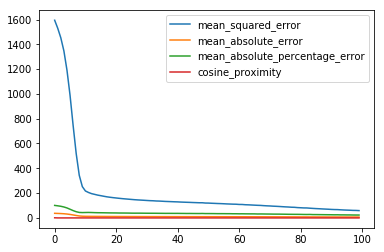

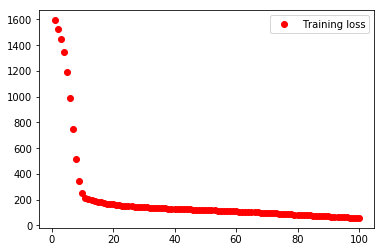

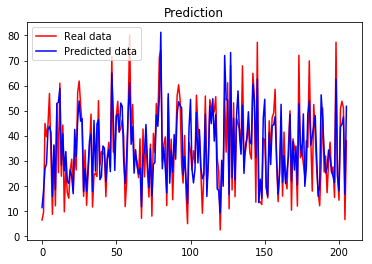

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_acc = history.history['val_mean_absolute_error']
mape_loss=history.history['mean_absolute_percentage_error']
cosine_los=history.history['cosine_proximity']
plt.plot(history.history['mean_squared_error'], label = 'mean_squared_error')
plt.plot(history.history['mean_absolute_error'], label = 'mean_absolute_error')
plt.plot(history.history['mean_absolute_percentage_error'], label = 'mean_absolute_percentage_error')
plt.plot(history.history['cosine_proximity'], label = 'cosine_proximity')
plt.legend()
plt.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)

plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [19]:
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, p = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(y_test, y_pred)

79.39025930580608